# IRIS Dataset- Task 2
## Name: Nikshep Shah
## Language : R
### GRIPMAY22

In [49]:
library(stats)

library(factoextra)
library(NbClust)

library(parameters)
library(mclust)

### Step-1 : Load the given dataset

In [50]:
iris=read.csv("iris.csv",stringsAsFactors = TRUE)

### Pick the useful data from the given dataset

In [30]:
iris=iris[,2:5]

In [32]:
iris

SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
<dbl>,<dbl>,<dbl>,<dbl>
5.1,3.5,1.4,0.2
4.9,3.0,1.4,0.2
4.7,3.2,1.3,0.2
4.6,3.1,1.5,0.2
5.0,3.6,1.4,0.2
5.4,3.9,1.7,0.4
4.6,3.4,1.4,0.3
5.0,3.4,1.5,0.2
4.4,2.9,1.4,0.2


### Step-2 : Clean and make data appropriate to apply algorithms

### We get to know that the parameters have different range of values,so we scale the data appropriately.

In [31]:
iris_z=as.data.frame(lapply(iris, scale))

### Scaled data

In [33]:
iris_z

SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
<dbl>,<dbl>,<dbl>,<dbl>
-0.89767388,1.0286113,-1.336794,-1.3085928
-1.13920048,-0.1245404,-1.336794,-1.3085928
-1.38072709,0.3367203,-1.393470,-1.3085928
-1.50149039,0.1060900,-1.280118,-1.3085928
-1.01843718,1.2592416,-1.336794,-1.3085928
-0.53538397,1.9511326,-1.166767,-1.0465248
-1.50149039,0.7979809,-1.336794,-1.1775588
-1.01843718,0.7979809,-1.280118,-1.3085928
-1.74301699,-0.3551707,-1.336794,-1.3085928


### Step-3:  We try to predict optimal number of clusters using various methods

#### 1. Elbow Method : The point closest to the point(0,0) is picked up as the number of clusters

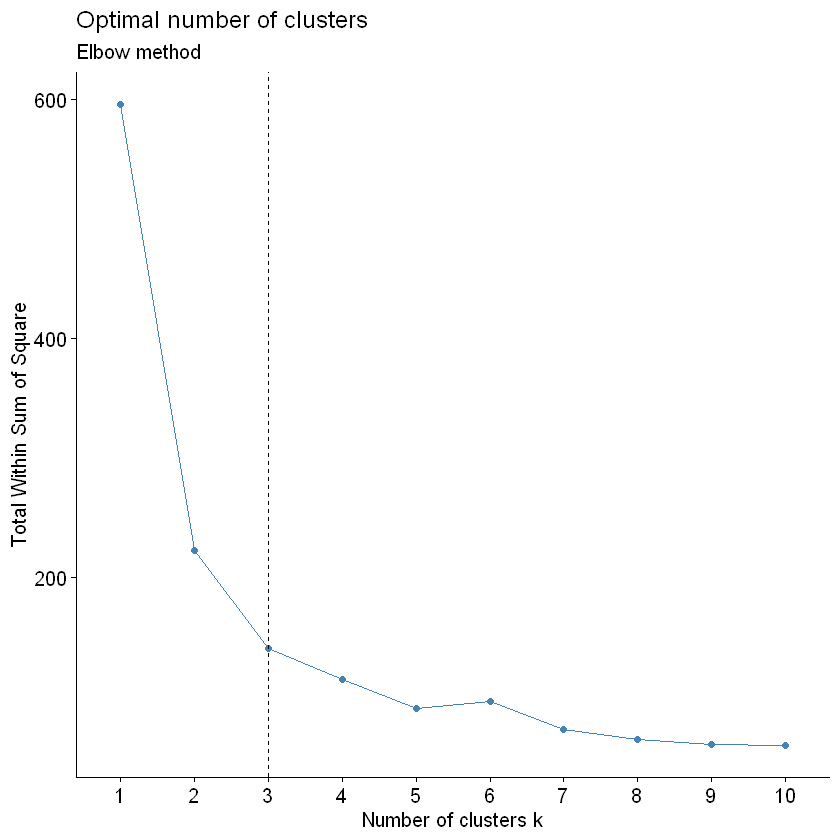

In [37]:
fviz_nbclust(iris_z, kmeans, method = "wss") +
  geom_vline(xintercept = 3, linetype = 2) +
  labs(subtitle = "Elbow method")

#### 2. Silhouette Method: Point with maximum y-coordinate is picked as the number of clusters

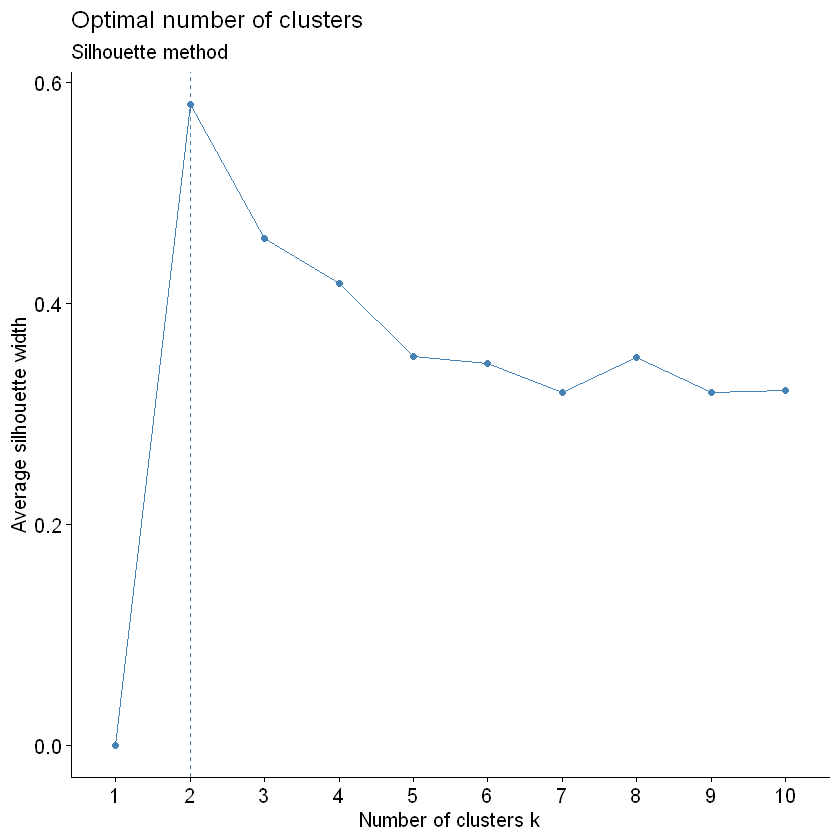

In [38]:
fviz_nbclust(iris_z, kmeans, method = "silhouette") +
  labs(subtitle = "Silhouette method")

#### This command uses various methods for cluster finding and gives result of each method

In [41]:
n_clust <- n_clusters(iris_z,
                      package = c("easystats", "NbClust", "mclust"),
                      standardize = TRUE)
n_clust

,n_Clusters,Method,Package,Duration
,<dbl>,<chr>,<chr>,<dbl>
1,2,Elbow,easystats,0.02193999
2,2,Silhouette,easystats,0.01695490
3,2,Gap_Maechler2012,easystats,0.72344613
4,2,Gap_Dudoit2002,easystats,0.72745299
5,2,Ch,NbClust,0.03128815
6,2,DB,NbClust,0.03123713
8,2,Duda,NbClust,0.03470898
9,2,Pseudot2,NbClust,0.02065396
10,2,Beale,NbClust,0.07576704


### Step-4 :K-Means Clustering

#### Optimal number of clusters are three

In [42]:
 iris_clusters=kmeans(iris_z,3)

In [43]:
iris_clusters

K-means clustering with 3 clusters of sizes 50, 53, 47

Cluster means:
  SepalLengthCm SepalWidthCm PetalLengthCm PetalWidthCm
1   -1.01119138    0.8394944    -1.3005215   -1.2509379
2   -0.05005221   -0.8773526     0.3463713    0.2811215
3    1.13217737    0.0962759     0.9929445    1.0137756

Clustering vector:
  [1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 2 2 2 3 2 2 2 2 2 2 2 2 3 2 2 2 2 3 2 2 2
 [75] 2 3 3 3 2 2 2 2 2 2 2 3 3 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 3 3 3 3 2 3 3 3 3
[112] 3 3 2 2 3 3 3 3 2 3 2 3 2 3 3 2 3 3 3 3 3 3 2 2 3 3 3 2 3 3 3 2 3 3 3 2 3
[149] 3 2

Within cluster sum of squares by cluster:
[1] 48.15831 44.25778 47.60995
 (between_SS / total_SS =  76.5 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

### Step-5 : Visualizing K-Means Clusters

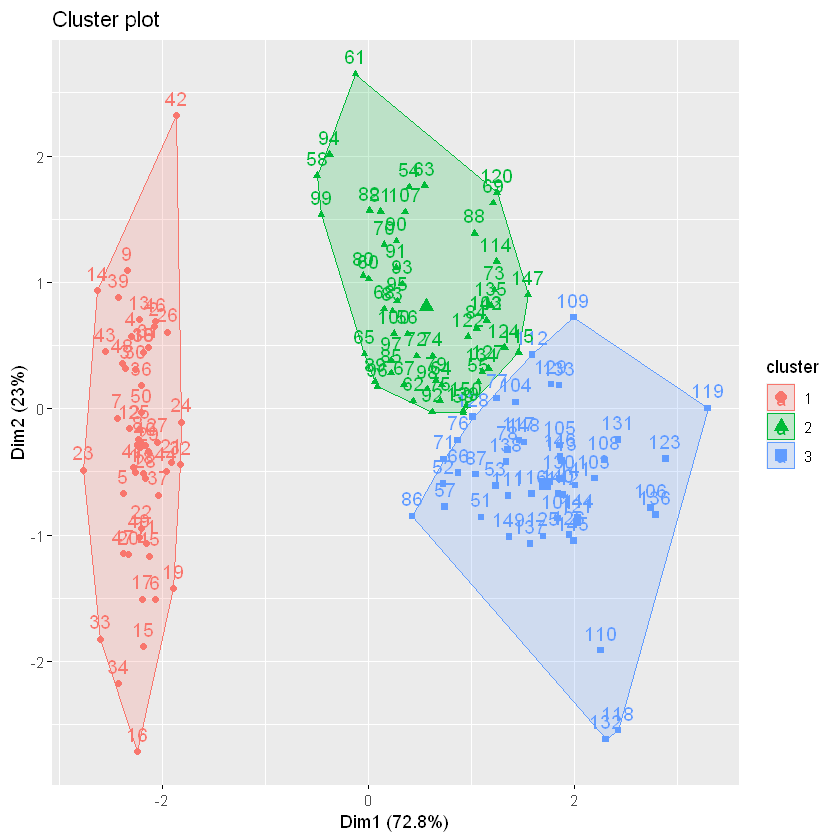

In [46]:
fviz_cluster(iris_clusters,data=iris_z)